In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

IMPORTING DATA


48895
  neighbourhood_group  longitude  latitude        room_type  price  \
0            Brooklyn  -73.97237  40.64749     Private room    149   
1           Manhattan  -73.98377  40.75362  Entire home/apt    225   
2           Manhattan  -73.94190  40.80902     Private room    150   
3            Brooklyn  -73.95976  40.68514  Entire home/apt     89   
4           Manhattan  -73.94399  40.79851  Entire home/apt     80   

   minimum_nights  Neighbourhood  RoomType  
0               1              1         1  
1               1             -1        -1  
2               3             -1         1  
3               1              1        -1  
4              10             -1        -1  
      neighbourhood_group  longitude  latitude        room_type  price  \
48890            Brooklyn  -73.94995  40.67853     Private room     70   
48891            Brooklyn  -73.93317  40.70184     Private room     40   
48892           Manhattan  -73.94867  40.81475  Entire home/apt    115   
48893  

<AxesSubplot: >

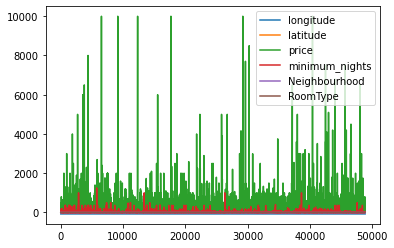

In [7]:
#KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution.
#  In other words, the model structure determined from the dataset.
data = pd.read_csv(r"C:\Users\User\Downloads\data.csv")
print(len(data))
print(data.head())
print(data.tail())
data.plot()

SPLITTING DATASET

In [8]:

data1 = pd.DataFrame(data)
X = data1.iloc[:,[1, 2, 4, 5, 6]].values
y = data1.iloc[:,7].values

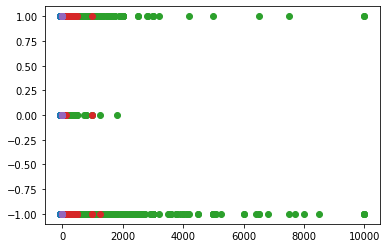

In [9]:
plt.scatter(data1['longitude'], data1['RoomType'])
plt.scatter(data1['latitude'], data1['RoomType'])
plt.scatter(data1['price'], data1['RoomType'])
plt.scatter(data1['minimum_nights'], data1['RoomType'])
plt.scatter(data1['Neighbourhood'], data1['RoomType'])



TRAINING AND TESTING SET

In [10]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0)


FEATURE SCALING

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


FITTING OF DATASET INTO KNN MODEL

In [12]:

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

TEST RESULT

In [14]:
y_pred = classifier.predict(X_test)


REPORT 
-PRECISION: The ability of a classifier not to label an instance positive that is actually negative. It shows what percentage of your predictions were correct.

-RECALL: The ability of a classifier to find all positive instances. It shows the percentage of the positive cases the classifier was able to catch.

-F1 SCORE: This is simply a merge of recall and precision. If the F1 Score is high then usually both recall and precision tend to be high. If it is low then the recall and precision tend to be bad.

In [15]:
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(cm)


              precision    recall  f1-score   support

          -1       0.83      0.85      0.84      7599
           0       0.63      0.34      0.44       349
           1       0.81      0.80      0.80      6721

    accuracy                           0.82     14669
   macro avg       0.75      0.66      0.69     14669
weighted avg       0.81      0.82      0.81     14669

[[6482    7 1110]
 [  47  117  185]
 [1291   62 5368]]
